<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ADA</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Predictions</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data_updated/data_aux/df_ADA.csv')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09
1822,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1823,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1824,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ADA-USD_ADJCLOSE  1642 non-null   float64
 2   ADA-USD_CLOSE     1642 non-null   float64
 3   ADA-USD_HIGH      1642 non-null   float64
 4   ADA-USD_LOW       1642 non-null   float64
 5   ADA-USD_OPEN      1642 non-null   float64
 6   ADA-USD_VOLUME    1642 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ADA-USD_ADJCLOSE,184
ADA-USD_CLOSE,184
ADA-USD_HIGH,184
ADA-USD_LOW,184
ADA-USD_OPEN,184
ADA-USD_VOLUME,184


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADA-USD_ADJCLOSE,1642.0,4.979681e-01,6.666151e-01,2.396100e-02,5.543350e-02,1.228265e-01,9.096440e-01,2.968239e+00
ADA-USD_CLOSE,1642.0,4.979681e-01,6.666151e-01,2.396100e-02,5.543350e-02,1.228265e-01,9.096440e-01,2.968239e+00
ADA-USD_HIGH,1642.0,5.197363e-01,6.947860e-01,2.599300e-02,5.730800e-02,1.266030e-01,9.487265e-01,3.099186e+00
ADA-USD_LOW,1642.0,4.737491e-01,6.365800e-01,1.913000e-02,5.265375e-02,1.168420e-01,8.683565e-01,2.907606e+00
ADA-USD_OPEN,1642.0,4.975280e-01,6.666069e-01,2.395400e-02,5.524250e-02,1.225470e-01,9.132757e-01,2.966390e+00
ADA-USD_VOLUME,1642.0,1.203558e+09,2.174168e+09,2.930550e+06,6.561815e+07,2.014080e+08,1.374642e+09,1.914198e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
1431,2021-04-09,1.203540,1.203540,1.228980,1.194931,1.219454,1.678934e+09
1760,2022-03-04,0.842889,0.842889,0.903050,0.830861,0.902793,1.115109e+09
337,2018-04-11,0.166029,0.166029,0.166431,0.154079,0.156761,9.179330e+07
442,2018-07-25,0.172731,0.172731,0.175304,0.166820,0.172360,1.236490e+08
1373,2021-02-10,0.930318,0.930318,0.943893,0.703548,0.703548,1.266765e+10
252,2018-01-16,0.626493,0.626493,0.780621,0.479944,0.780621,1.632650e+09
1584,2021-09-09,2.517666,2.517666,2.621054,2.387085,2.406712,6.031548e+09
1541,2021-07-28,1.283504,1.283504,1.316583,1.260048,1.280826,1.793329e+09
92,2017-08-09,NaN,NaN,NaN,NaN,NaN,NaN
1350,2021-01-18,0.371428,0.371428,0.395443,0.366233,0.379735,3.480283e+09


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-05-09,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
179,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
180,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
181,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
182,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1637,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09
1638,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1639,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1640,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1637,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09
1638,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09
1639,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09
1640,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,18716200.0,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6766780.0,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5532220.0,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7280250.0,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4419440.0,5.595160,11.938711


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

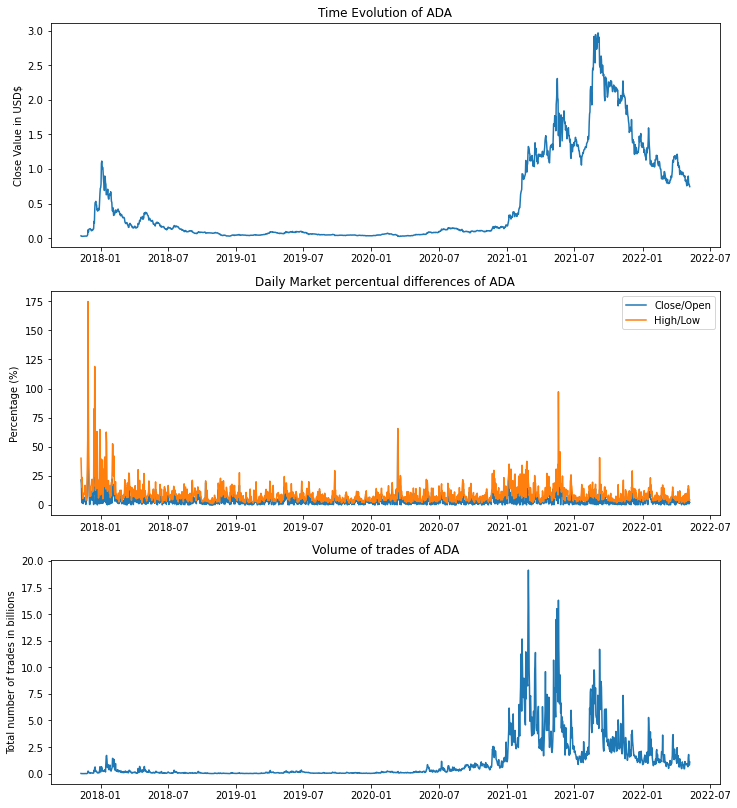

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1453,2021-11-01,1.950002,1.950002,2.015316,1.917960,1.964962,2.649339e+09,0.767181,5.076016
1454,2021-11-02,1.971377,1.971377,1.996540,1.934827,1.949818,2.459980e+09,1.093601,3.189587
1455,2021-11-03,2.063701,2.063701,2.144626,1.950845,1.971404,4.722706e+09,4.472400,9.933178
1456,2021-11-04,1.984882,1.984882,2.100966,1.956403,2.064559,3.301214e+09,4.014193,7.389222
1457,2021-11-05,1.986206,1.986206,2.018975,1.963668,1.984745,2.274852e+09,0.073559,2.816516
...,...,...,...,...,...,...,...,...,...
1637,2022-05-04,0.896942,0.896942,0.897661,0.769638,0.771107,1.516023e+09,14.029335,16.634180
1638,2022-05-05,0.791152,0.791152,0.904111,0.778141,0.897061,1.802129e+09,13.386680,16.188583
1639,2022-05-06,0.783359,0.783359,0.798315,0.765742,0.791065,1.312284e+09,0.983711,4.253781
1640,2022-05-07,0.761882,0.761882,0.785116,0.750657,0.783352,8.015589e+08,2.818023,4.590511


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,1.950002,2.124419,2021-11-08
1,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,2.273483,2021-11-09
2,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,2.101802,2021-11-10
3,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.085524,2021-11-11
4,2.085524,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,2.045766,2021-11-12
...,...,...,...,...,...,...,...,...,...
177,0.771145,0.781529,0.790344,0.756660,0.805043,0.843950,0.840595,0.896942,2022-05-04
178,0.896942,0.771145,0.781529,0.790344,0.756660,0.805043,0.843950,0.791152,2022-05-05
179,0.791152,0.896942,0.771145,0.781529,0.790344,0.756660,0.805043,0.783359,2022-05-06
180,0.783359,0.791152,0.896942,0.771145,0.781529,0.790344,0.756660,0.761882,2022-05-07


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((182,), (182, 7, 1), (182,))

In [18]:
X.shape, y.shape

((182, 7, 1), (182,))

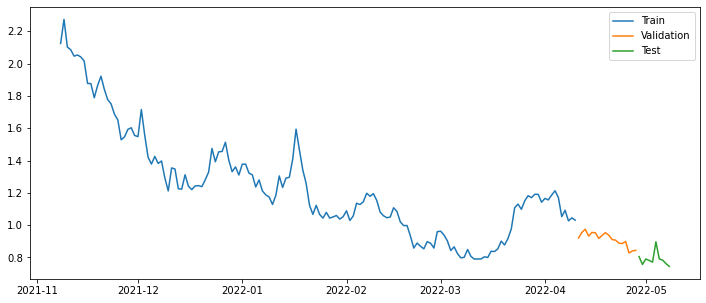

In [19]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [20]:
#!pip install tensorflow

In [21]:
# import os
# os.environ['PYTHONHASHSEED']= '0'
# import numpy as np
# np.random.seed(1)
# import random as rn
# rn.seed(1)
# import tensorflow as tf
# tf.random.set_seed(1)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# from sklearn.metrics import mean_squared_error

# # Function to create LSTM model and compute the MSE value for the given parameters
# def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
#     # create model
#     model = Sequential([layers.Input((7, 1)),
#                         layers.LSTM(64),
#                         layers.Dense(32, activation='relu'),
#                         layers.Dense(32, activation='relu'),
#                         layers.Dense(1)])
#     # Compile model
#     model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
#     model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
#     test_predictions = model.predict(X_test).flatten()
    
#     LSTM_mse = mean_squared_error(y_test, test_predictions)
    
#     return LSTM_mse

# #Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
# def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
#     best_score = float('inf')
    
#     for b in batch_size:
#         for e in epochs:
#             for l in learn_rate:
#                 print('Batch Size: ' + str(b))
#                 print('Number of Epochs: ' + str(e))
#                 print('Value of Learning Rate: ' + str(l))
#                 try:
#                     mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                     print('MSE=%.3f' % (mse))
#                     if mse < best_score:
#                         best_score = mse
#                         top_params = [b, e, l]
#                 except:
#                     continue
                    
#     print('Best MSE=%.3f' % (best_score))
#     print('Optimal Batch Size: ' + str(top_params[0]))
#     print('Optimal Number of Epochs: ' + str(top_params[1]))
#     print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# # define parameters
# batch_size = [10, 100, 1000]
# epochs = [50, 100]
# learn_rate = np.linspace(0.001,0.1, num=10)

# warnings.filterwarnings("ignore")
# search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [22]:
#BEST SOLUTION OF THE MODEL

# Best MSE=0.001
# Optimal Batch Size: 10
# Optimal Number of Epochs: 100
# Optimal Value of Learning Rate: 0.012
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error


model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.012),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.6097 - mean_absolute_error: 0.6070 - val_loss: 0.0185 - val_mean_absolute_error: 0.1321 - 1s/epoch - 91ms/step
Epoch 2/100
16/16 - 0s - loss: 0.1011 - mean_absolute_error: 0.2578 - val_loss: 0.0173 - val_mean_absolute_error: 0.1267 - 51ms/epoch - 3ms/step
Epoch 3/100
16/16 - 0s - loss: 0.2004 - mean_absolute_error: 0.3609 - val_loss: 0.0235 - val_mean_absolute_error: 0.1496 - 51ms/epoch - 3ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0812 - mean_absolute_error: 0.2197 - val_loss: 0.0108 - val_mean_absolute_error: 0.0985 - 50ms/epoch - 3ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0837 - mean_absolute_error: 0.2264 - val_loss: 0.0013 - val_mean_absolute_error: 0.0285 - 51ms/epoch - 3ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0868 - mean_absolute_error: 0.2310 - val_loss: 0.0016 - val_mean_absolute_error: 0.0356 - 51ms/epoch - 3ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0714 - mean_absolute_error: 0.2121 - val_loss: 0.0068 - val_mean_absolute_error: 0.0765 - 52ms/epo

Epoch 58/100
16/16 - 0s - loss: 0.0520 - mean_absolute_error: 0.1824 - val_loss: 0.0276 - val_mean_absolute_error: 0.1632 - 49ms/epoch - 3ms/step
Epoch 59/100
16/16 - 0s - loss: 0.0619 - mean_absolute_error: 0.2081 - val_loss: 0.0024 - val_mean_absolute_error: 0.0431 - 49ms/epoch - 3ms/step
Epoch 60/100
16/16 - 0s - loss: 0.0690 - mean_absolute_error: 0.1893 - val_loss: 0.0041 - val_mean_absolute_error: 0.0576 - 49ms/epoch - 3ms/step
Epoch 61/100
16/16 - 0s - loss: 0.0284 - mean_absolute_error: 0.1405 - val_loss: 0.0221 - val_mean_absolute_error: 0.1436 - 49ms/epoch - 3ms/step
Epoch 62/100
16/16 - 0s - loss: 0.0148 - mean_absolute_error: 0.0965 - val_loss: 0.0013 - val_mean_absolute_error: 0.0274 - 49ms/epoch - 3ms/step
Epoch 63/100
16/16 - 0s - loss: 0.0300 - mean_absolute_error: 0.1300 - val_loss: 0.0020 - val_mean_absolute_error: 0.0401 - 49ms/epoch - 3ms/step
Epoch 64/100
16/16 - 0s - loss: 0.0148 - mean_absolute_error: 0.0943 - val_loss: 0.0041 - val_mean_absolute_error: 0.0460 - 

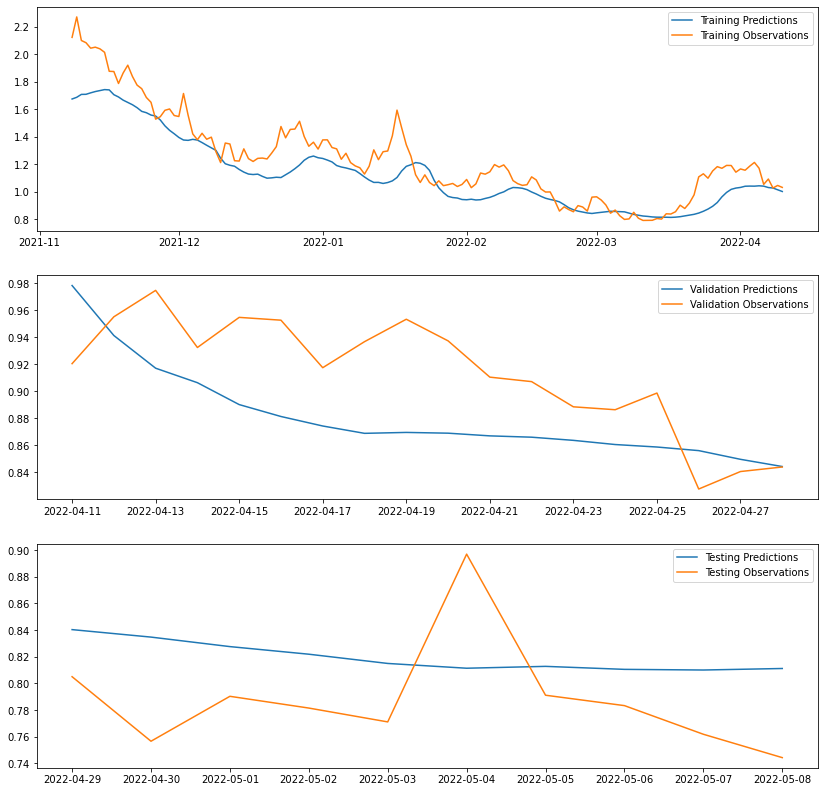

In [23]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [24]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

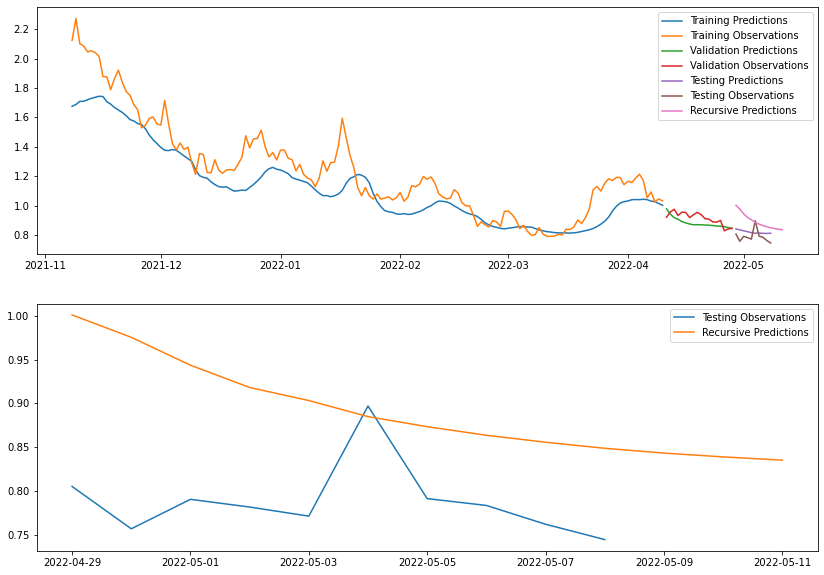

In [25]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

## <font color='#5D6D7E'>Saving Predictions</font> <a class="anchor" id="twentyseventh-bullet"></a>
  [Back to TOC](#toc)

In [33]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('ADA-USD', 0.83883333)